# Question#1



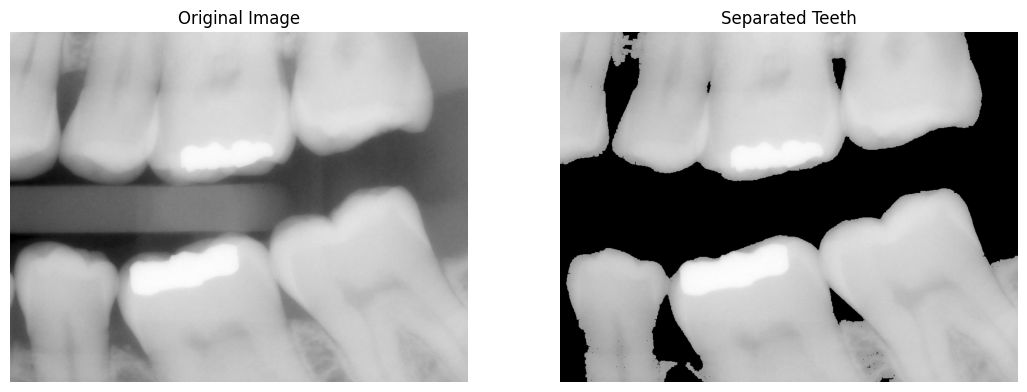

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os 
from PIL import Image

def separate_teeth(image_path):
    # Load image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply threshold to create a binary image
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Remove small objects using morphological opening
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Find the two largest connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(opening)
    largest_labels = np.argsort(stats[1:, cv2.CC_STAT_AREA])[::-1][:2] + 1
    mask = np.zeros_like(labels, dtype=np.uint8)
    mask[np.isin(labels, largest_labels)] = 255

    # Apply the mask to the input image
    masked_image = cv2.bitwise_and(img, img, mask=mask)

    # Set the rest of the image to black
    black_image = np.zeros_like(img)
    black_image[mask == 0] = (0, 0, 0)

    # Combine the masked image and black image to get the final result
    result_image = masked_image + black_image

    # Display the original image and the resulting image
    fig, axs = plt.subplots(1, 2, figsize=(13, 10))
    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    axs[1].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Separated Teeth')
    plt.axis('off')
    plt.show()


separate_teeth('data/dental_xray.tif')



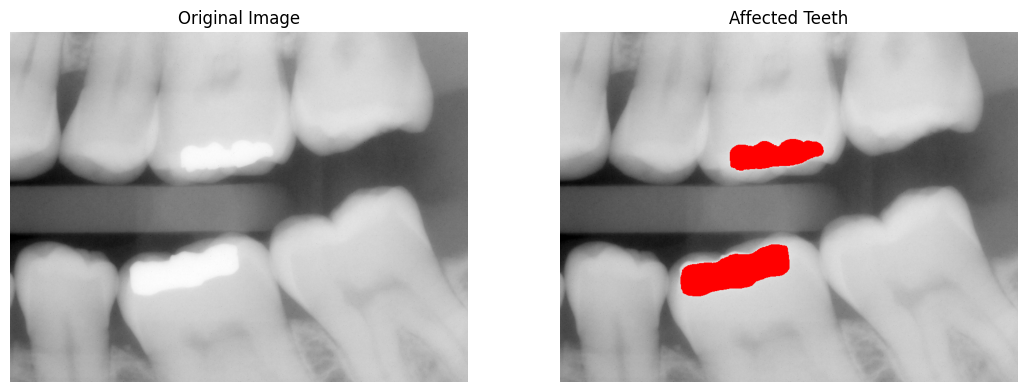

In [2]:
# Load the image
img = cv2.imread('data/dental_xray.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the maximum intensity value in the image
max_intensity = np.max(gray)

# Threshold the image to obtain a binary mask of the region of interest
_, mask = cv2.threshold(gray, max_intensity - 20, 255, cv2.THRESH_BINARY)

# Dilate the mask to include neighboring pixels in the region of interest
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask, kernel, iterations=1)

# Convert the mask to 3 channels to use it as a color mask
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Set all the pixels in the original image to red color where the mask is white
result = img.copy()
result[np.where((mask == [255, 255, 255]).all(axis=2))] = [0, 0, 255]

# Display the original image and the resulting image
fig, axs = plt.subplots(1, 2, figsize=(13, 10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
axs[1].set_title('Affected Teeth')
# save the affected teeth
cv2.imwrite('data/affected_teeth.png', result)
plt.axis('off')
plt.show()



In [3]:
def find_red_pixels_percentage(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Convert color space from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Define the lower and upper bounds of the red color
    lower_red = np.array([0, 0, 100])
    upper_red = np.array([100, 100, 255])
    # Create a mask to identify the red pixels
    mask = cv2.inRange(img_rgb, lower_red, upper_red)

    # Calculate the total number of pixels in the image
    total_pixels = img.shape[0] * img.shape[1]

    # Calculate the number of red pixels in the image
    num_red_pixels = np.count_nonzero(mask)

    # Calculate the percentage of red pixels in the image
    percentage_red_pixels = (num_red_pixels / total_pixels) * 100

    # Return the percentage of red pixels in the image
    return percentage_red_pixels

red_pixels_percentage = find_red_pixels_percentage('data/affected_teeth.png')
print('Percentage of red pixels in the image:', red_pixels_percentage)


Percentage of red pixels in the image: 0.36620978757477274


# Question#2

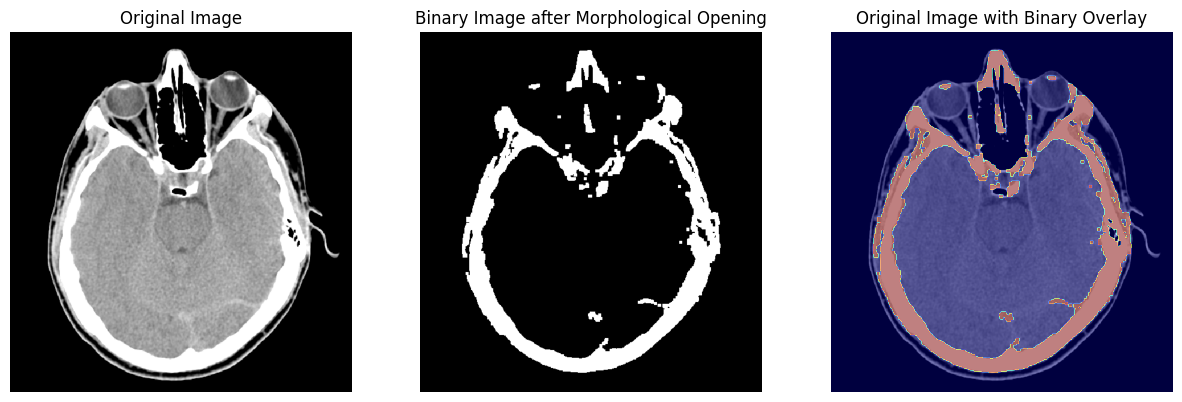

In [4]:

def intensity_slicing(image_path):
    # Load image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Set the threshold values
    low_threshold = 180
    high_threshold = 255

    # Apply the threshold to create a binary image
    _, thresh = cv2.threshold(gray, low_threshold, high_threshold, cv2.THRESH_BINARY)

    # Apply morphological opening to remove noise
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Display the original image, binary image, and original with binary overlay
    fig, axs = plt.subplots(1, 3, figsize=(15, 10))
    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    axs[1].imshow(opening, cmap='gray')
    axs[1].set_title('Binary Image after Morphological Opening')
    axs[1].axis('off')
    axs[2].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[2].imshow(opening, cmap='jet', alpha=0.5)
    axs[2].set_title('Original Image with Binary Overlay')
    axs[2].axis('off')
    # save the Binary Image after Morphological Opening
    cv2.imwrite('data/binary_image.png', opening)
    plt.show()

intensity_slicing('data/brain.tif')



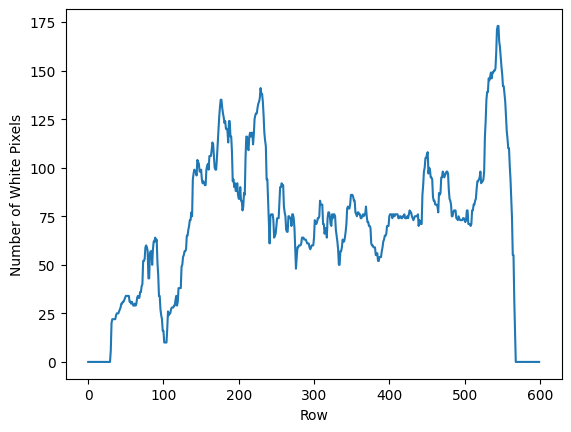

In [5]:
def intensity_slicing(image_path):
    # Load image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Set the threshold values
    low_threshold = 180
    high_threshold = 255

    # Apply the threshold to create a binary image
    _, thresh = cv2.threshold(gray, low_threshold, high_threshold, cv2.THRESH_BINARY)

    # Remove noise
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Count white pixels in each row
    rows, cols = opening.shape[:2]
    white_pixels = np.zeros(rows)
    for i in range(rows):
        white_pixels[i] = np.sum(opening[i, :] == 255)

    # Plot the data
    plt.plot(white_pixels)
    plt.xlabel('Row')
    plt.ylabel('Number of White Pixels')
    plt.show()

# Test the function on the brain image
intensity_slicing('data/binary_image.png')


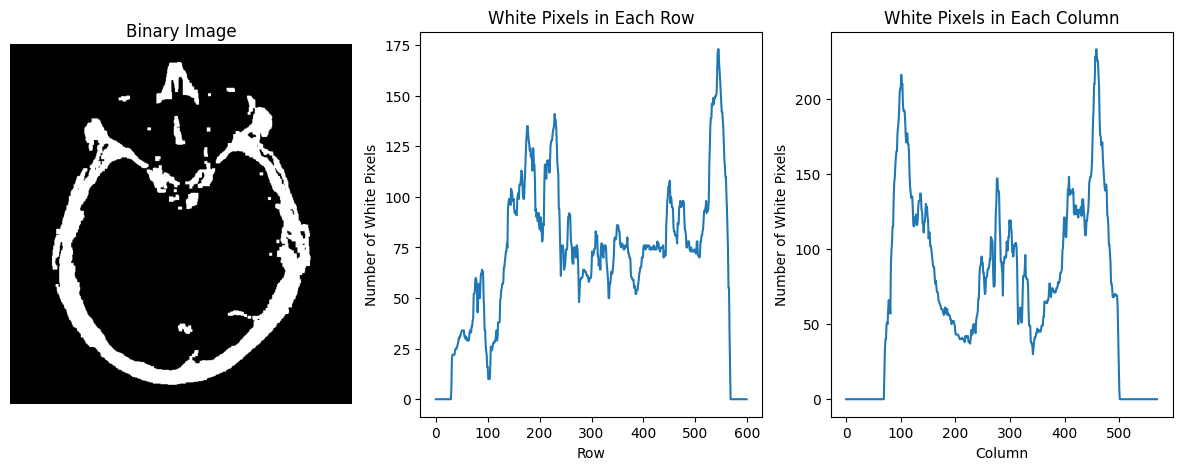

In [6]:


def intensity_slicing(image_path):
    # Load image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Set the threshold values
    low_threshold = 180
    high_threshold = 255

    # Apply the threshold to create a binary image
    _, thresh = cv2.threshold(gray, low_threshold, high_threshold, cv2.THRESH_BINARY)

    # Remove noise
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Count white pixels in each row
    rows, cols = opening.shape[:2]
    white_pixels_rows = np.zeros(rows)
    for i in range(rows):
        white_pixels_rows[i] = np.sum(opening[i, :] == 255)

    # Count white pixels in each column
    white_pixels_cols = np.zeros(cols)
    for j in range(cols):
        white_pixels_cols[j] = np.sum(opening[:, j] == 255)

    # Plot the data
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(opening, cmap='gray')
    axs[0].set_title('Binary Image')
    axs[0].axis('off')
    axs[1].plot(white_pixels_rows)
    axs[1].set_xlabel('Row')
    axs[1].set_ylabel('Number of White Pixels')
    axs[1].set_title('White Pixels in Each Row')
    axs[2].plot(white_pixels_cols)
    axs[2].set_xlabel('Column')
    axs[2].set_ylabel('Number of White Pixels')
    axs[2].set_title('White Pixels in Each Column')
    plt.show()

# Test the function on the brain image
intensity_slicing('data/binary_image.png')



# Question#3

/var/folders/cx/z_1z7md90_g07htdlgjfpqlh0000gn/T/ipykernel_27864/2378288311.py:12: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + img) ** t


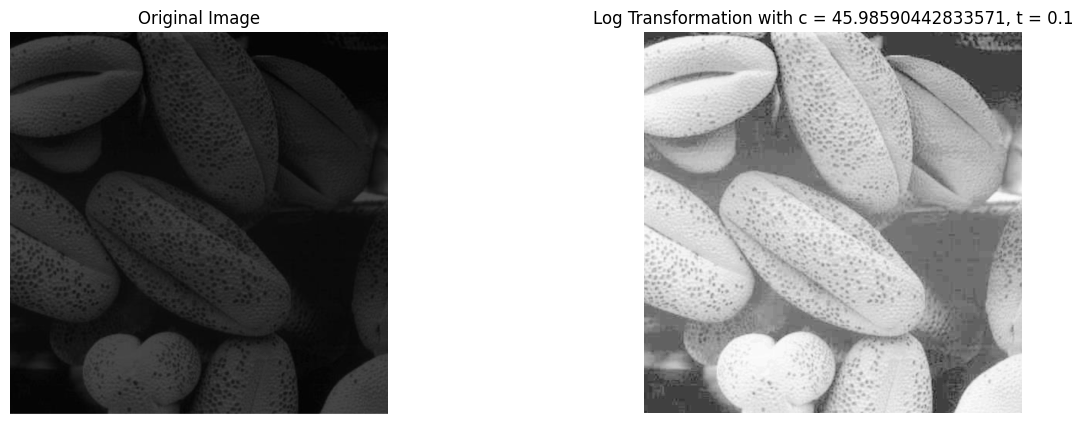

/var/folders/cx/z_1z7md90_g07htdlgjfpqlh0000gn/T/ipykernel_27864/2378288311.py:12: RuntimeWarning: invalid value encountered in sqrt
  log_transformed = c * np.log(1 + img) ** t


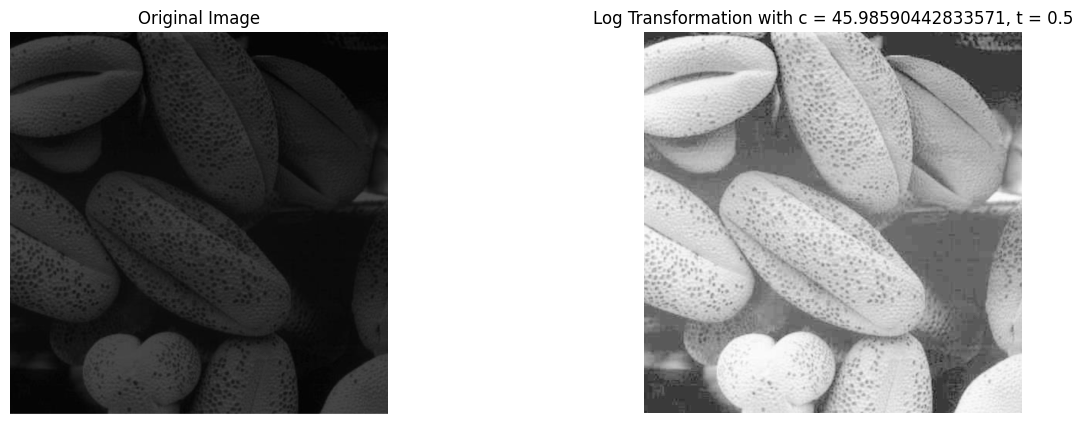

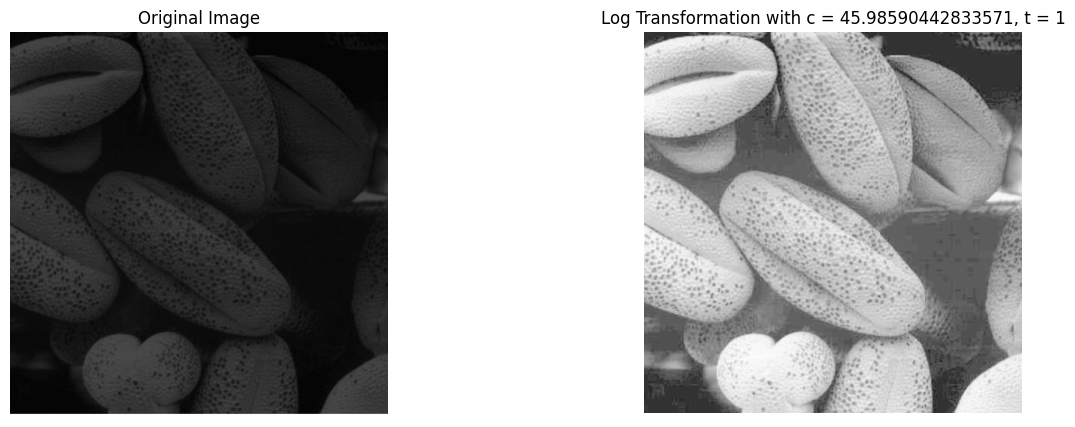

/var/folders/cx/z_1z7md90_g07htdlgjfpqlh0000gn/T/ipykernel_27864/2378288311.py:12: RuntimeWarning: overflow encountered in multiply
  log_transformed = c * np.log(1 + img) ** t


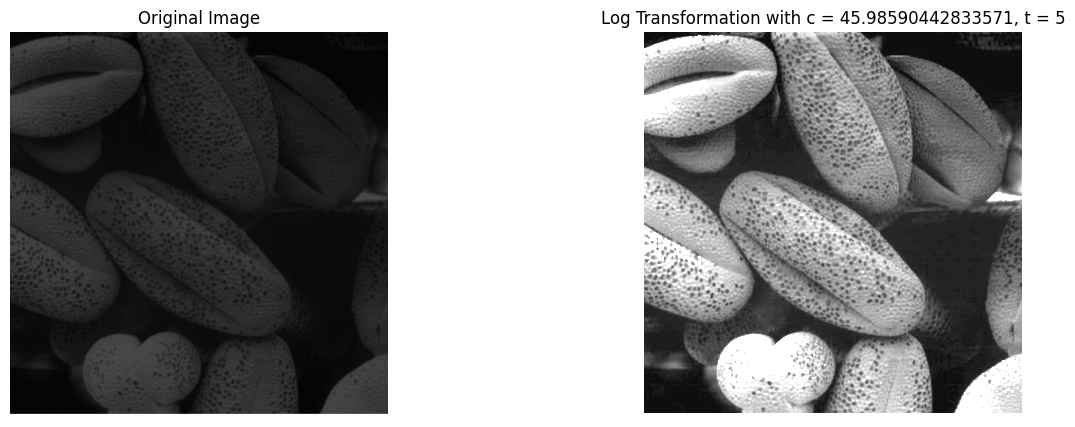

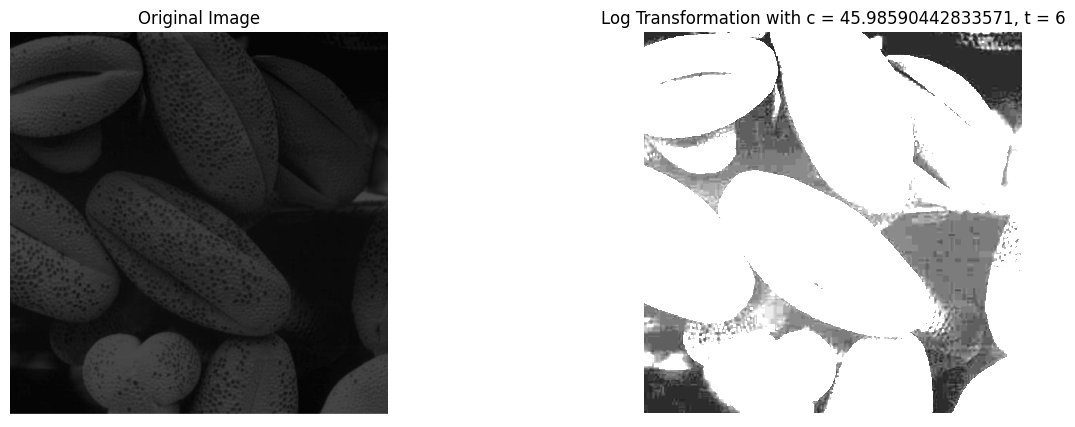

In [7]:

# Load the image
img = cv2.imread('data/grain.png', 0)

# Set the scaling factor
c = 255 / np.log(1 + np.max(img))

# Apply different log transformations
transformations = [0.1, 0.5, 1, 5, 6]

for t in transformations:
    # Apply the logarithmic transformation
    log_transformed = c * np.log(1 + img) ** t
    
    # Display the output and parameter values
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    axs[1].imshow(log_transformed, cmap='gray')
    axs[1].set_title('Log Transformation with c = ' + str(c) + ', t = ' + str(t))
    axs[1].axis('off')
    plt.show()

    


# Question#4

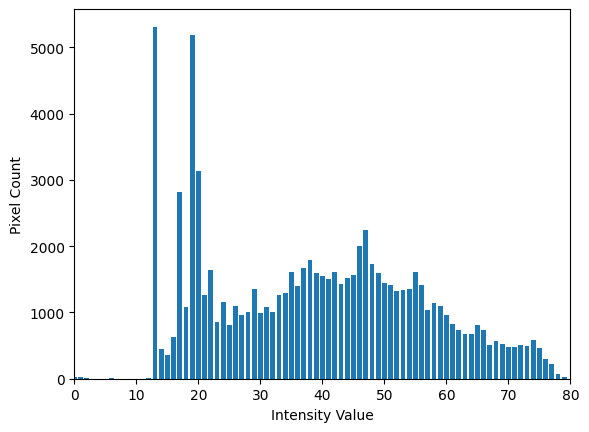

In [8]:

def count_pixel_intensities(image_path):
    # Open image file for reading in binary mode
    with open(image_path, "rb") as f:
        # Read the header of the image file
        header = f.read(54)

        # Extract the width and height of the image from the header
        width = int.from_bytes(header[18:22], byteorder="little")
        height = int.from_bytes(header[22:26], byteorder="little")

        # Calculate the total number of pixels in the image
        pixel_count = width * height

        # Calculate the buffer size (minimum of actual file size and pixel count * 3)
        file_size = os.path.getsize(image_path)
        buffer_size = min(pixel_count * 3, file_size - 54)

        # Read the pixel data from the image file into a buffer
        buffer = f.read(buffer_size)

    # Count the number of occurrences of each intensity value
    intensity_counts = [0] * 256
    for j in range(buffer_size // 3):
        # Extract the RGB values of the current pixel
        r = buffer[j * 3]
        g = buffer[j * 3 + 1]
        b = buffer[j * 3 + 2]

        # Convert the RGB values to grayscale intensity
        intensity = round(0.299 * r + 0.587 * g + 0.114 * b)

        # Increment the count for the current intensity value
        intensity_counts[intensity] += 1

    # Return the list of intensity counts
    return intensity_counts


# Call the count_pixel_intensities function to get the list of intensity counts
intensity_counts = count_pixel_intensities("data/grain3.tif")

# Plot the intensity counts as a bar graph
plt.bar(range(256), intensity_counts)
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.xlim(0, 80)
plt.show()


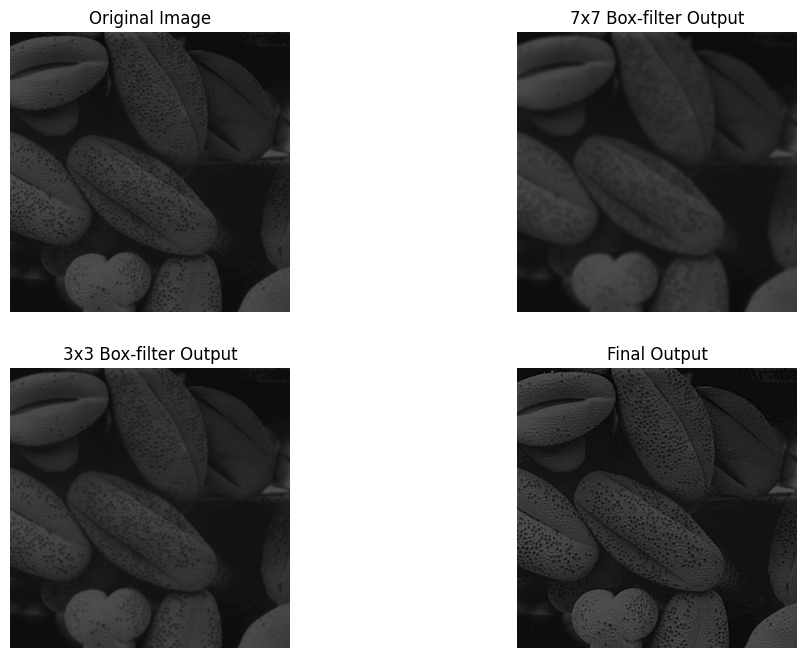

In [9]:
# Read the input image
img = cv2.imread('data/grain3.tif')

# Apply 7x7 Box-filter
O7 = cv2.boxFilter(img, ddepth=-1, ksize=(7,7))

# Apply 3x3 Box-filter
O3 = cv2.boxFilter(img, ddepth=-1, ksize=(3,3))

# Compute the final output
final_output = img - np.abs(O7 - O3)

# Display the resulting images using Matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(O7, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('7x7 Box-filter Output')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(O3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('3x3 Box-filter Output')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(final_output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Final Output')

plt.show()



The bottle is 92.97% filled.
Bottle is properly filled.


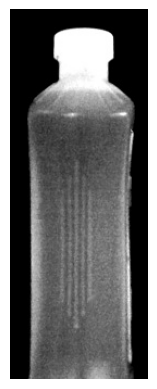

In [10]:
def calculate_filled_percentage(gray_image_path, threshold):
    # Load the grayscale image
    gray_image = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)

    # Threshold the image to get the bottle
    ret, bottle = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)

    # Invert the bottle image to get the syrup
    syrup = cv2.bitwise_not(bottle)

    # Count the number of white pixels in the syrup image
    num_syrup_pixels = cv2.countNonZero(syrup)

    # Count the total number of pixels in the bottle image
    num_bottle_pixels = bottle.shape[0] * bottle.shape[1]

    # Calculate the filled percentage
    filled_percentage = num_syrup_pixels / num_bottle_pixels * 100

    # Print the result
    print(f"The bottle is {filled_percentage:.2f}% filled.")
    if filled_percentage < threshold:
        print("Bottle is not properly filled.")
    else:
        print("Bottle is properly filled.")

calculate_filled_percentage(r'data/bottle2.jpg', 90)

img = Image.open(r'data/bottle2.jpg')
plt.imshow(img)
# axis off to remove the axis
plt.axis('off')
plt.show()
